# Network Definition and Vocabulary

In [3]:
import networkx as nx 
import matplotlib.pyplot as plt



## undirected network

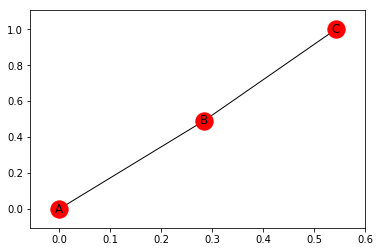

In [7]:
G=nx.Graph()
G.add_edge('A','B')
G.add_edge('C','B')
nx.draw_networkx(G)
plt.show()

## directed network

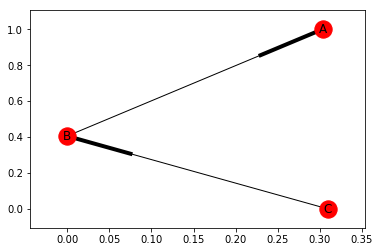

In [6]:
G_di=nx.DiGraph()
G_di.add_edge('B','A')
G_di.add_edge('C','B')
nx.draw_networkx(G_di)
plt.show()

## weighted networks

In [14]:
G_w=nx.Graph()
G_w.add_edge('A','B',weight=6)
G_w.add_edge('C','B',weight=13)
nx.draw_networkx(G_w)
G_w.edges(data=True)
#plt.show()

[('A', 'B', {'weight': 6}), ('B', 'C', {'weight': 13})]

## Signed networks

In [15]:
G_s=nx.Graph()
G_s.add_edge('A','B',sign='+')
G_s.add_edge('C','B',sign='-')
G_s.edges(data=True)

[('A', 'B', {'sign': '+'}), ('B', 'C', {'sign': '-'})]

## edge attributes

In [16]:
G=nx.Graph()
G.add_edge('A','B',relation='friend')
G.add_edge('C','B',relation='cowoker')
G.add_edge('D','E',relation='family')
G.edges(data=True)

[('A', 'B', {'relation': 'friend'}),
 ('B', 'C', {'relation': 'cowoker'}),
 ('D', 'E', {'relation': 'family'})]

## multigraph

In [17]:
G=nx.MultiGraph()
G.add_edge('A','B',relation='friend')
G.add_edge('A','B',relation='coworker')
G.add_edge('C','B',relation='cowoker')
G.add_edge('D','E',relation='family')
G.edges(data=True)

[('A', 'B', {'relation': 'friend'}),
 ('A', 'B', {'relation': 'coworker'}),
 ('B', 'C', {'relation': 'cowoker'}),
 ('D', 'E', {'relation': 'family'})]

# node and edge attribute

In [18]:
G=nx.Graph()
G.add_edge('A','B',weight=6,relation='friend')
G.add_edge('C','B',weight=13,relation='cowoker')
G.add_edge('D','E',relation='family')
G.edges(data=True)

[('A', 'B', {'relation': 'friend', 'weight': 6}),
 ('B', 'C', {'relation': 'cowoker', 'weight': 13}),
 ('D', 'E', {'relation': 'family'})]

In [19]:
G.edges(data='relation')

[('A', 'B', 'friend'), ('B', 'C', 'cowoker'), ('D', 'E', 'family')]

In [20]:
G.edge['A']['B']

{'relation': 'friend', 'weight': 6}

In [21]:
G.edge['B']['C']['weight']

13

In [22]:
#directed, weighted network
G=nx.DiGraph()
G.add_edge('A','B',weight=6,relation='friend')
G.add_edge('C','B',weight=13,relation='cowoker')

G.edges(data=True)

[('A', 'B', {'relation': 'friend', 'weight': 6}),
 ('C', 'B', {'relation': 'cowoker', 'weight': 13})]

In [23]:
G.edge['B']['C']['weight']#directed graph, order matters

KeyError: 'C'

In [24]:
G=nx.MultiGraph()
G.add_edge('A','B',weight=6,relation='friend')
G.add_edge('A','B',weight=13,relation='cowoker')

G.edges(data=True)

[('A', 'B', {'relation': 'friend', 'weight': 6}),
 ('A', 'B', {'relation': 'cowoker', 'weight': 13})]

In [25]:
G.edge['A']['B']

{0: {'relation': 'friend', 'weight': 6},
 1: {'relation': 'cowoker', 'weight': 13}}

In [26]:
G.edge['A']['B'][0]['weight']

6

In [29]:
#directed multigraph
G=nx.MultiDiGraph()
G.add_edge('A','B',weight=6,relation='friend')
G.add_edge('A','B',weight=13,relation='cowoker')
G.add_edge('C','B',weight=8,relation='family')
G.edges(data=True)

[('A', 'B', {'relation': 'friend', 'weight': 6}),
 ('A', 'B', {'relation': 'cowoker', 'weight': 13}),
 ('C', 'B', {'relation': 'family', 'weight': 8})]

In [30]:
G.edge['A']['B'][0]['weight']

6

In [31]:
G.edge['B']['A'][0]['weight']#order matters

KeyError: 'A'

## node attributes

In [32]:
G=nx.Graph()
G.add_edge('A','B',weight=6,relation='friend')
G.add_edge('C','B',weight=13,relation='cowoker')
G.add_edge('D','E',relation='family')
G.add_node('A',role='trader')
G.add_node('B',role='trader')
G.add_node('C',role='manager')
G.nodes(data=True)

[('A', {'role': 'trader'}),
 ('B', {'role': 'trader'}),
 ('C', {'role': 'manager'}),
 ('D', {}),
 ('E', {})]

# bipartite graphs

In [33]:
from networkx.algorithms import bipartite

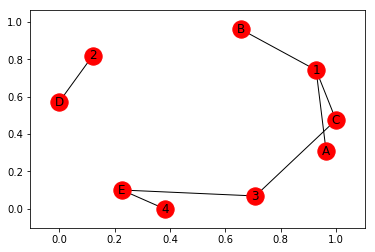

In [51]:
B=nx.Graph()
B.add_nodes_from(['A','B','C','D','E'],bipartite=0)
B.add_nodes_from([1,2,3,4],bipartite=1)
B.add_edges_from([('A',1),('B',1),('C',1),('C',3),('D',2),('E',3),('E',4)])
nx.draw_networkx(B)
plt.show()

In [46]:
bipartite.is_bipartite(B)

True

In [47]:
B.add_edge('A','B')
bipartite.is_bipartite(B)

False

In [48]:
B.remove_edge('A','B')

In [49]:
X=set([1,2,3,4])
bipartite.is_bipartite_node_set(B,X)

True

In [50]:
bipartite.sets(B)

({'A', 'B', 'C', 'D', 'E'}, {1, 2, 3, 4})

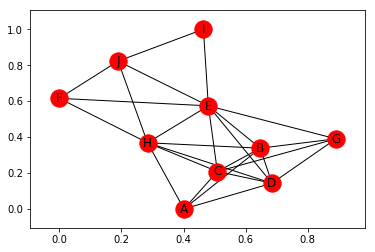

In [55]:
B = nx.Graph()
B.add_edges_from([('A',1),('B',1),('C',1),('D',1),
                  ('H',1),('B',2),('C',2),('D',2),
                  ('E',2),('G',2),('E',3),('F',3),
                  ('H',3),('J',3),('E',4),('I',4),('J',4)])
X = set(['A','B','C','D','E','F','G','H','J','I'])
P = bipartite.projected_graph(B,X)
nx.draw_networkx(P)
plt.show()

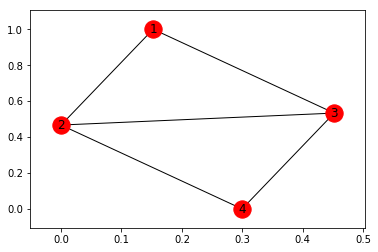

In [56]:
Y=set([1,2,3,4])
P = bipartite.projected_graph(B,Y)
nx.draw_networkx(P)
plt.show()

In [58]:
P = bipartite.weighted_projected_graph(B,Y)
P.edges(data=True)

[(1, 2, {'weight': 3}),
 (1, 3, {'weight': 1}),
 (2, 3, {'weight': 1}),
 (2, 4, {'weight': 1}),
 (3, 4, {'weight': 2})]